| MSSV     | Họ và tên       |
|----------|-----------------|
| 19120511 | Võ Văn Hiếu     |
| 19120526 | Huỳnh Đức Huy   |
| 19120539 | Vương Thế Khang |

## Import

In [1]:
# Imporant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

# Scipy
from scipy.stats import boxcox, chi2_contingency

# Sklearn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Set options
pd.set_option('display.max_columns', 999)
sns.set_theme(style = 'whitegrid')

# Config warning
warnings.simplefilter(action = 'ignore', category = FutureWarning)

# A. THU THẬP DỮ LIỆU

Bộ dữ liệu mà nhóm chọn là bộ dữ liệu được lấy từ một cuộc khảo sát năm 2014 về việc đo tình trạng của bệnh nhân đối với sức khỏe tâm thần và tần suất rối loạn sức khỏe tâm thần tại những nơi làm việc về mảng công nghệ.

Các file dữ liệu này bao gồm:
- File "survey.csv": bộ dữ liệu được thu thập từ [Kaggle](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey)

Người thu thập dữ liệu: OPEN SOURCING MENTAL ILLNESS, LTD

License: Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)

# B. KHÁM PHÁ DỮ LIỆU

Đầu tiên, ta sẽ xem thử bộ dữ liệu trông như thế nào. Đọc dữ liệu từ file "survey.csv" và lưu vào dataframe `health_df`.

In [2]:
health_df = pd.read_csv('https://raw.githubusercontent.com/vt-khang/KHDLUD_Tuan7-8/main/survey.csv')
health_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
health_df.shape

(1259, 27)

Vậy dữ liệu có kích thước **1259 dòng x 27 cột**.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin về câu trả lời cho các câu hỏi khảo sát về tình trạng sức khỏe, có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Kiểm tra xem dữ liệu có các dòng bị lặp không và lưu kết quả vào biến `have_duplicated_row`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [4]:
have_duplicated_row = any(health_df.duplicated())
have_duplicated_row

False

Như vậy, không có dòng nào bị lặp lại.

### Mỗi cột có ý nghĩa gì?

Mỗi cột dưới đây trả lời cho mỗi câu hỏi tương ứng sau:
- **Timestamp**: Thời gian khảo sát này được gửi đi
- **Age**: Tuổi của người trả lời
- **Gender**: Giới tính của người trả lời
- **Country**: Quốc tịch của người trả lời
- **state**: Nếu bạn sống ở Hoa Kỳ, bạn sống ở tiểu bang hoặc vùng lãnh thổ nào?
- **self_employed**: Bạn có đang tự chủ?
- **family_history**: Gia đình bạn có tiền sử bệnh tâm thần không?
- **treatment**: Bạn đã tìm cách điều trị cho tình trạng sức khỏe tâm thần?
- **work_interfere**: Nếu bạn bị tâm thần, bạn có cảm thấy nó cản trở công việc của bạn không?
- **no_employees**: Có bao nhiêu nhân viên trong công ty hoặc tổ chức của bạn?
- **remote_work**: Bạn có làm việc từ xa (bên ngoài văn phòng) ít nhất 50% thời gian không?
- **tech_company**: Công ty của bạn có phải là công ty công nghệ hay không?
- **benefits**: Chủ lao động có cung cấp các phúc lợi khám sức khỏe tâm thần không?
- **care_options**: Bạn có biết các lựa chọn chăm sức sức khỏe tâm thần do chủ lao động cung cấp hay không?
- **wellness_program**: Chủ lao động đã bao giờ thảo luận về sức khỏe tâm thần như một phần của chương trình chăm sóc sức khỏe cho nhân viên chưa?
- **seek_help**: Chủ lao động có cung cấp các nguồn tài liệu để tìm hiểu thêm về các vấn đề sức khỏe tâm thần và làm thể nào để tìm kiếm sự giúp đỡ không?
- **anonymity**: Danh tính của bạn có được bảo vệ nếu bạn chọn tận dụng các nguồn lực để điều trị sức khỏe tâm thần hoặc lạm dụng các chất kích thích không?
- **leave**: Bạn có dễ dàng xin nghỉ phép vì tình trạng sức khỏe tâm thần không?
- **mental_health_consequence**: Bạn có nghĩ rằng việc thảo luận về vấn đề sức khỏe tâm thần với chủ lao động sẽ dẫn đến những hậu quả tiêu cực không?
- **phys_health_consequence**:  Bạn có nghĩ rằng việc thảo luận về vấn đề sức khỏe thể chất với chủ lao động sẽ dẫn đến những hậu quả tiêu cực không?
- **coworkers**: Bạn có sẵn sàng thảo luận về vấn đề sức khỏe tâm thần với đồng nghiệp của mình không?
- **supervisor**: Bạn có sẵn sàng thảo luận về vấn đề sức khỏe tâm thần với (những) người giám sát trực tiếp của mình không?
- **mental_health_interview**: Bạn có đưa ra vấn đề sức khỏe tâm thần với nhà tuyển dụng tiềm năng trong một buổi phỏng vấn không?
- **phys_health_interview**: Bạn có đưa ra vấn đề sức khỏe thể chất với nhà tuyển dụng tiềm năng trong một buổi phỏng vấn không?
- **mental_vs_physical**: Bạn có cảm thấy rằng chủ lao động coi trọng sức khỏe tâm thần như sức khỏe thể chất không?
- **obs_consequence**: Bạn đã từng nghe qua hoặc quan sát thấy những hậu quả tiêu cực đối với đồng nghiệp mắc bệnh tâm thần tại nơi làm việc của bạn chưa?
- **comments**: Bất cứ ghi chú hoặc nhận xét bổ sung

### Mỗi cột hiện đang có kiểu dữ liệu gì?

Xem thử kiểu dữ liệu của các cột dữ liệu.

In [5]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Như vậy có thể thấy cột "Timestamp" đang có kiểu dữ liệu `object`. Ta cần đưa cột này về dạng `datetime`.

---

**Tiền xử lý dữ liệu**: Thay đổi kiểu dữ liệu

Thay đổi kiểu dữ liệu của cột "Timestamp" sang kiểu dữ liệu dạng `datetime`.

In [6]:
health_df['Timestamp'] = health_df['Timestamp'].astype('datetime64')

Xem thử kiểu dữ liệu của các cột dữ liệu sau khi tiền xử lý.

In [7]:
health_df.dtypes

Timestamp                    datetime64[ns]
Age                                   int64
Gender                               object
Country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

---

Có vẻ các cột đều có kiểu dữ liệu phù hợp. Nếu trong quá trình phân tích dữ liệu cần phải thay đổi kiểu dữ liệu của các cột thì ta sẽ quay lại tiền xử lý ở đây, tạm thời ta chấp nhận kiểu dữ liệu hiện tại của các cột.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Với mỗi cột numerical, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị xuất hiện (count), giá trị nhỏ nhất (min), giá trị trung bình (mean), giá trị trung vị (median), giá trị lớn nhất (max), các khoảng tứ phân vị (Q1, Q2, Q3) và độ lệch chuẩn (std). Sau đó ta sẽ lưu các giá trị này vào dataframe `numerical_col_df` thành 10 dòng là "num_missing_val", "ratio_missing_val", "count", "min", "mean", "median", "max", "Q1", "Q2", "Q3", "std".

In [8]:
def num_missing_val(s):
  return s.isna().sum()
def ratio_missing_val(s):
  return s.isna().mean() * 100
def count(s):
  return s.count();
def Q1(s):
  return s.quantile(0.25)
def Q2(s):
  return s.quantile(0.5)
def Q3(s):
  return s.quantile(0.75)

numerical_cols = health_df.select_dtypes(include = 'number').columns
numerical_col_df = health_df[numerical_cols].agg([num_missing_val, ratio_missing_val, count, min, np.mean, np.median, max, Q1, Q2, Q3, np.std]).T
numerical_col_df[['num_missing_val', 'count']] = numerical_col_df[['num_missing_val', 'count']].astype(int)
numerical_col_df

,num_missing_val,ratio_missing_val,count,min,mean,median,max,Q1,Q2,Q3,std
Age,0,0.0,1259,-1726.0,7.942815e+07,31.0,1.000000e+11,27.0,31.0,36.0,2.818299e+09


Ta thấy các giá trị min ở cột "Age" mang giá trị âm và giá trị max ở cột "Age" là một con số rất lớn không phản ảnh đúng độ tuổi.

---

**Tiền xử lý dữ liệu:** Làm sạch dữ liệu

Trước tiên, ta sẽ xem thử danh sách các giá trị khác nhau (không xét giá trị NaN) của cột "Age".

In [9]:
health_df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

Quan sát ta có thể thấy có một vài giá trị độ tuổi mang giá trị âm **(-29, -1, -1726)** hoặc là một con số rất lớn **(99999999999, 329)** không phản ánh đúng độ tuổi thật sự của người trả lời khảo sát. Ngoài ra, đây là dữ liệu được thu thập từ những người đã và đang đi làm (thường là những người trên 18 tuổi), do đó các con số về độ tuổi dưới 18 **(5, 8, 11)** cũng được xem là sai sự thật.

Sau đó, ta sẽ xem thử các mẫu dữ liệu có độ tuổi sai sự thật.

In [10]:
health_df.loc[(health_df['Age'] < 0) | (health_df['Age'] > 100) | (health_df['Age'] < 18)]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


Ta sẽ có cách xử lý sau đây:
- Đối với dòng **143**, độ tuổi của người trả lời là **-29**, có thể đây là sai sót trong lúc điền khảo sát có dư kí tự "-" nên ta sẽ thay giá trị độ tuổi ở dòng này thành **29** mà vẫn thỏa điều kiện.
- Đối với dòng **364**, độ tuổi của người trả lời là **329**, tuy nhiên có thể người điền khảo sát điền nhầm và dẫn tới nó có thể là 1 trong 3 kết quả sau đây: **32, 29, 39**. Do đó ta sẽ thay bằng giá trị trung vị (median) của cột "Age" mà vẫn đảm bảo không bias cho các kết quả nào ở trên.
- Các dòng còn lại có độ tuổi nhỏ hơn 0 hoặc lớn hơn 100 được xem như là điền sai sự thật nên ta sẽ thay bằng giá trị trung vị (median) của cột "Age".

In [11]:
health_df.loc[health_df['Age'] == -29, 'Age'] = 29
health_df.loc[health_df['Age'] == 329, 'Age'] = numerical_col_df['median']['Age']
health_df.loc[(health_df['Age'] < 0) | (health_df['Age'] > 100) | (health_df['Age'] < 18), 'Age'] = numerical_col_df['median']['Age']

Cuối cùng, ta sẽ xem lại bảng thống kê mô tả của cột "Age" để kiểm tra xem có còn xuất hiện các giá trị sai sự thật không.

In [12]:
numerical_col_df = health_df[['Age']].agg([num_missing_val, ratio_missing_val, count, min, np.mean, np.median, max, Q1, Q2, Q3, np.std]).T
numerical_col_df[['num_missing_val', 'count']] = numerical_col_df[['num_missing_val', 'count']].astype(int)
numerical_col_df

,num_missing_val,ratio_missing_val,count,min,mean,median,max,Q1,Q2,Q3,std
Age,0,0.0,1259,18.0,32.068308,31.0,72.0,27.0,31.0,36.0,7.266018


---

Có vẻ các thống kê mô tả của các cột dạng số không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?


Với mỗi cột categorical, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị xuất hiện (count), giá trị xuất hiện nhiều nhất (mode), số lượng các giá trị khác nhau (không xét giá trị NaN) và danh sách các giá trị khác nhau (không xét giá trị NaN). Sau đó ta sẽ lưu các giá trị này vào dataframe `categical_col_df` thành 6 dòng là "num_missing_val", "ratio_missing_val", "count", "most_frequency", "num_diff_vals", "diff_vals".

In [13]:
pd.set_option('display.max_colwidth', 500)

In [14]:
def num_diff_vals(s):
  return s.nunique()
def diff_vals(s):
  return s.dropna().astype('object').unique()
def most_frequency(s):
  return s.mode()[0]

categorical_cols = health_df.select_dtypes(include = 'object').columns
categorical_col_df = health_df[categorical_cols].agg([num_missing_val, ratio_missing_val, count, most_frequency, num_diff_vals, diff_vals]).T
categorical_col_df[['num_missing_val', 'count']] = categorical_col_df[['num_missing_val', 'count']].astype(int)
categorical_col_df

,num_missing_val,ratio_missing_val,count,most_frequency,num_diff_vals,diff_vals
Gender,0,0.0,1259,Male,49,"[Female, M, Male, male, female, m, Male-ish, maile, Trans-female, Cis Female, F, something kinda male?, Cis Male, Woman, f, Mal, Male (CIS), queer/she/they, non-binary, Femake, woman, Make, Nah, All, Enby, fluid, Genderqueer, Female , Androgyne, Agender, cis-female/femme, Guy (-ish) ^_^, male leaning androgynous, Male , Man, Trans woman, msle, Neuter, Female (trans), queer, Female (cis), Mail, cis male, A little about you, Malr, p, femail, Cis Man, ostensibly male, unsure what that really me..."
Country,0,0.0,1259,United States,48,"[United States, Canada, United Kingdom, Bulgaria, France, Portugal, Netherlands, Switzerland, Poland, Australia, Germany, Russia, Mexico, Brazil, Slovenia, Costa Rica, Austria, Ireland, India, South Africa, Italy, Sweden, Colombia, Latvia, Romania, Belgium, New Zealand, Zimbabwe, Spain, Finland, Uruguay, Israel, Bosnia and Herzegovina, Hungary, Singapore, Japan, Nigeria, Croatia, Norway, Thailand, Denmark, Bahamas, The, Greece, Moldova, Georgia, China, Czech Republic, Philippines]"
state,515,40.905481,744,CA,45,"[IL, IN, TX, TN, MI, OH, CA, CT, MD, NY, NC, MA, IA, PA, WA, WI, UT, NM, OR, FL, MN, MO, AZ, CO, GA, DC, NE, WV, OK, KS, VA, NH, KY, AL, NV, NJ, SC, VT, SD, ID, MS, RI, WY, LA, ME]"
self_employed,18,1.429706,1241,No,2,"[Yes, No]"
family_history,0,0.0,1259,No,2,"[No, Yes]"
treatment,0,0.0,1259,Yes,2,"[Yes, No]"
work_interfere,264,20.969023,995,Sometimes,4,"[Often, Rarely, Never, Sometimes]"
no_employees,0,0.0,1259,6-25,6,"[6-25, More than 1000, 26-100, 100-500, 1-5, 500-1000]"
remote_work,0,0.0,1259,No,2,"[No, Yes]"
tech_company,0,0.0,1259,Yes,2,"[Yes, No]"


Ta thấy có xuất hiện giá trị bị thiếu ở các cột "state", "self_employed", "work_interfere", "comments", trong đó cột "comments" có tỉ lệ giá trị bị thiếu nhiều nhất **(~87%)** so với các cột còn lại, sau đó là cột "state" có tỉ lệ giá trị bị thiếu gần 1 nửa **(41%)**.

Ngoài ra cột "Gender" có chứa nhiều giá trị khác nhau nhưng lại có sự tương đồng với ý nghĩa. Ví dụ: "M", "Male", "male", "m", ... đều biểu diễn cho giới tính nam.

---

**Tiền xử lý dữ liệu:** Làm sạch dữ liệu

Trước tiên, ta sẽ xem thử danh sách các giá trị khác nhau (không xét giá trị NaN) của cột "Gender".

In [15]:
health_df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Ta có thể phân loại thành 3 kiểu giới tính như sau:
- **Male**: M, Male, male, m, male-ish, maile, Cis Male, Mal, Male (CIS), Make, Male , Man, msle, Mail, cis male, Malr, Cis Man
- **Female**: Female, female, Cis Female, F, Woman, f, Femake, woman, Female, cis-female/femme, Female (cis), femail 
- **Other**: Trans-female, something kinda male?, queer/she/they, non-binary, Nah, All, Enby, fluid, Genderqueer, Androgyne, Agender, Guy (-ish) ^_^, male learning androgynous, Trans woman, Neuter, Female (trans), queer, A little about you, p, ostensibly male, unsure what that really means

In [16]:
def gender_convert(gender):
  if gender in ['M', 'Male', 'male', 'm', 'male-ish', 'maile', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man']:
    return "Male"
  elif gender in ['Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female', 'cis-female/femme', 'Female (cis)', 'femail']:
    return "Female"
  else:
    return "Other"

health_df['Gender'] = health_df['Gender'].agg(gender_convert)

Cuối cùng, ta sẽ xem lại bảng thống kê mô tả của các cột dạng phân loại.

In [17]:
categorical_col_df = health_df[['Gender']].agg([num_missing_val, ratio_missing_val, count, most_frequency, num_diff_vals, diff_vals]).T
categorical_col_df[['num_missing_val', 'count']] = categorical_col_df[['num_missing_val', 'count']].astype(int)
categorical_col_df

,num_missing_val,ratio_missing_val,count,most_frequency,num_diff_vals,diff_vals
Gender,0,0.0,1259,Male,3,"[Female, Male, Other]"


---

Có vẻ các cột dạng phân loại không có gì bất thường.

# C. TRỰC QUAN HÓA DỮ LIỆU

### Biểu diễn sự phân phối giới tính của những người trả lời phỏng vấn

Ta sẽ dùng biểu đồ tròn để thể hiện sự phân phối giới tính của những người trả lời phỏng vấn. Trong đó:
- Màu xanh dương: tỉ lệ % của người trả lời có giới tính nam (Male).
- Màu cam: tỉ lệ % của người trả lời có giới tính nam (Female).
- Màu xanh lá: tỉ lệ % của người trả lời có các loại giới tính còn lại (Other).

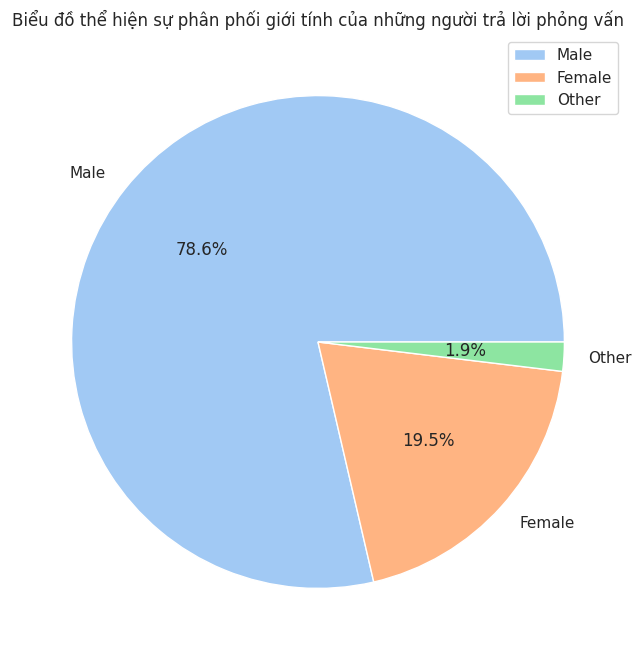

In [18]:
health_gender_df = health_df['Gender'].value_counts()
plt.figure(figsize = (12, 8))
plt.pie(health_gender_df, labels = health_gender_df.index, colors = sns.color_palette('pastel'), autopct = '%1.1f%%')
plt.title('Biểu đồ thể hiện sự phân phối giới tính của những người trả lời phỏng vấn')
plt.legend()
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy tỉ lệ người trả lời phỏng vấn có giới tính nam (Male) chiếm cao nhất **(~78.6%)**, trong khi đó tỉ lệ người trả lời phỏng vấn có giới tính nữ (Female) ít hơn nam gấp 4 lần **(~19.5%)**. Điều này cũng dễ hiểu vì trong ngành công nghệ có sự phân bố không đồng đều tỉ lệ nam giới cao hơn gấp nhiều lần so với nữ giới, do đó sẽ có nhiều nam giới được hỏi phỏng vấn hơn.

### Biểu diễn sự phân phối quốc tịch của những người trả lời phỏng vấn

Ta sẽ dùng biểu đồ cột để thể hiện số lượng những người trả lời phỏng vấn theo từng quốc tịch. Trong đó:
- Trục hoành: thể hiện tên các quốc gia (Country).
- Trục tung: thể hiện số người theo từng quốc tịch.

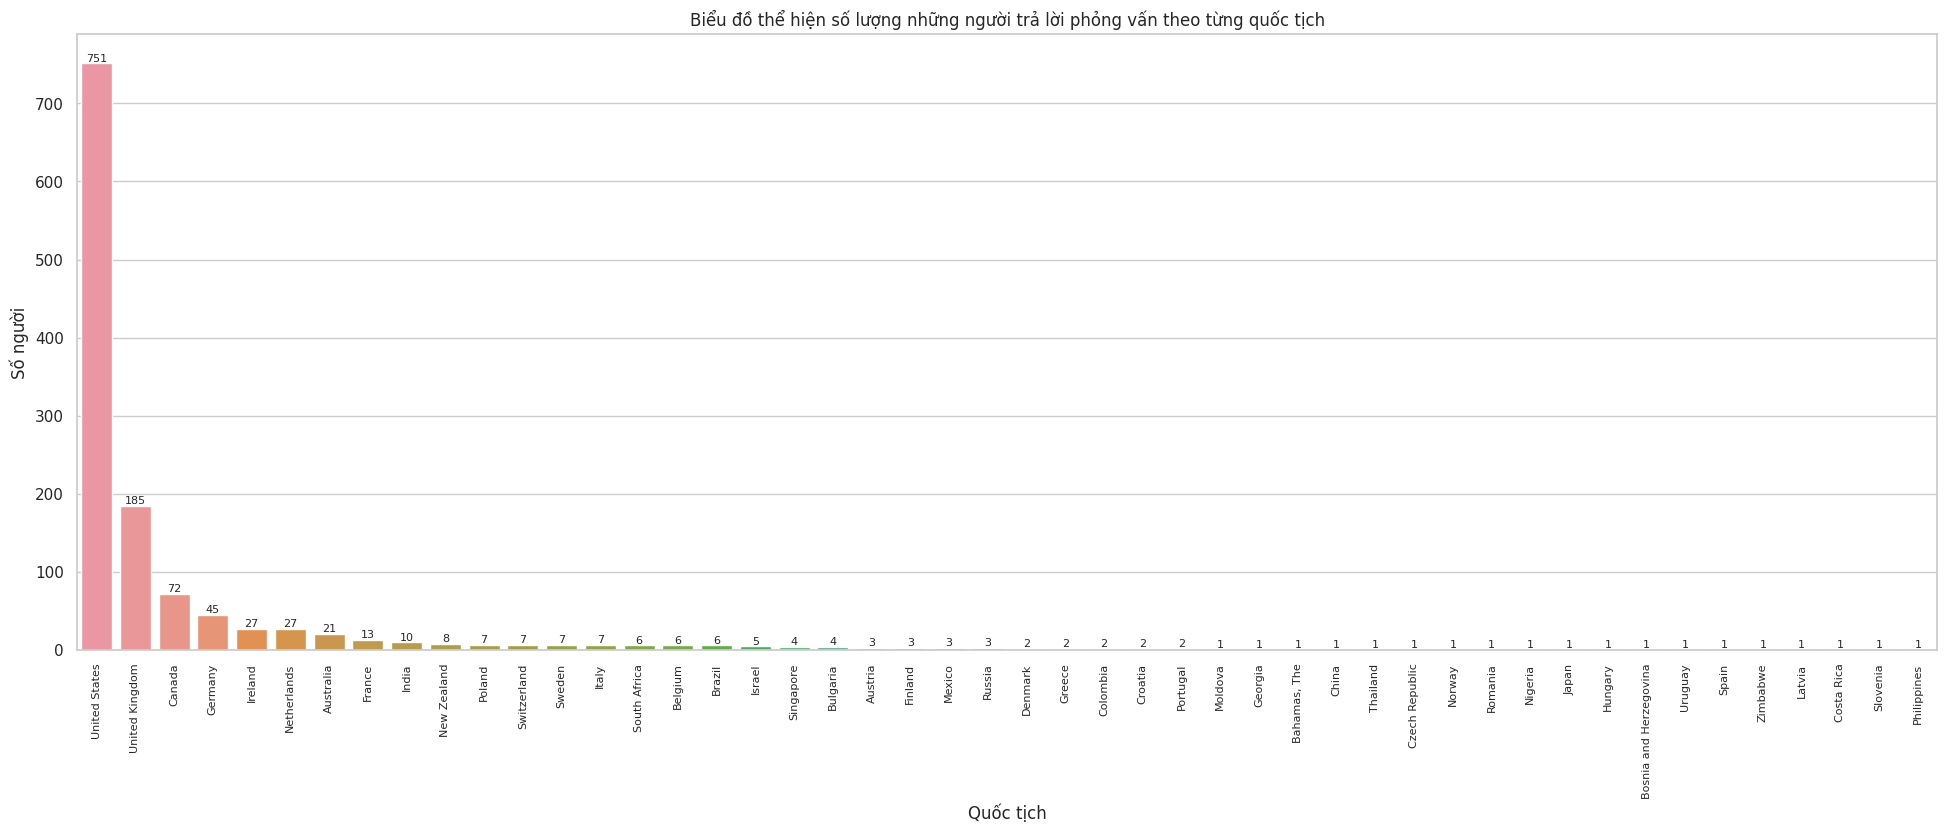

In [19]:
fig, ax = plt.subplots(figsize = (24, 8))
sns.countplot(data = health_df, x = 'Country', order = health_df['Country'].value_counts().index, ax = ax)
ax.bar_label(ax.containers[0], fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
plt.title('Biểu đồ thể hiện số lượng những người trả lời phỏng vấn theo từng quốc tịch')
plt.xlabel('Quốc tịch')
plt.ylabel('Số người')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy hầu hết những người trả lời phỏng vấn đều đến từ Mỹ **(751 người)**. Ngoài ra còn có một số người đến từ các nước châu Âu, Canada, Úc và Ấn Độ. Điều này cho thấy trong quá trình thu thập dữ liệu đã có bias người trả lời là các nhân viên của các công ty công nghệ Mỹ.

### Biểu đồ thể hiện làm việc từ xa can thiệp vào công việc do bệnh tâm thần

Ta sẽ dùng biểu đồ cột để thể hiện làm việc từ xa theo từng mức độ ảnh hưởng công việc do bệnh tâm thần. Trong đó:
- Trục hoành: thể hiện các mức độ ảnh hưởng công việc (work_interfere).
- Trục tung: thể hiện số người theo từng mức độ ảnh hưởng công việc.
- Màu xanh: thể hiện người trả lời không làm việc từ xa (remote_work).
- Màu cam: thể hiện người trả lời làm việc từ xa (remote_work).

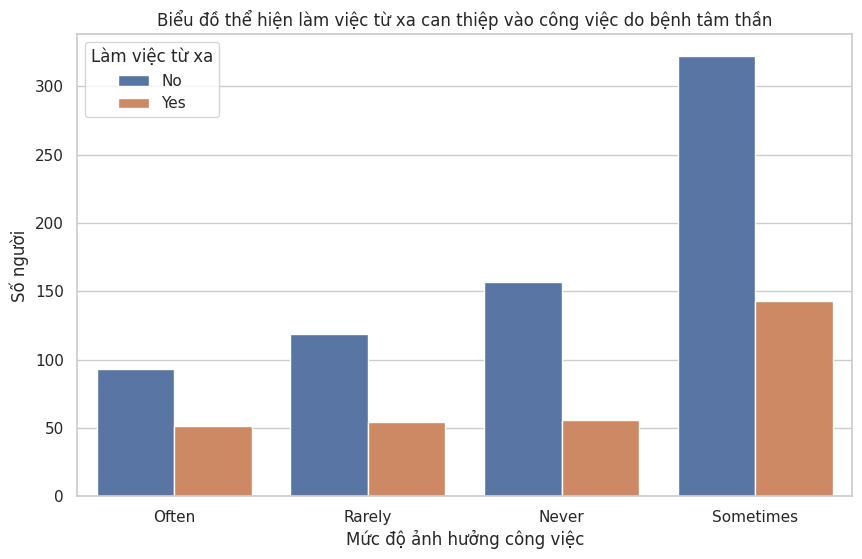

In [20]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(data = health_df, x = 'work_interfere', hue = 'remote_work', ax = ax)
plt.title('Biểu đồ thể hiện làm việc từ xa can thiệp vào công việc do bệnh tâm thần')
plt.xlabel('Mức độ ảnh hưởng công việc')
plt.ylabel('Số người')
plt.legend(title = 'Làm việc từ xa')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên, ta thấy theo từng mức độ ảnh hưởng công việc không có sự khác biệt đáng kể nào đối với công việc từ xa.

### Biểu đồ thể hiện khả năng tìm cách điều trị tâm thần ở nam giới và nữ giới

Ta sẽ dùng 2 biểu đồ tròn để thể hiện khả năng tìm cách điều trị tâm thần ở nam giới và nữ giới. Trong đó:
- Màu xanh dương: tỉ lệ % của người trả lời tìm cách điều trị tâm thần (treatment).
- Màu cam: tỉ lệ % của người trả lời không cần điều trị tâm thần (treatment).

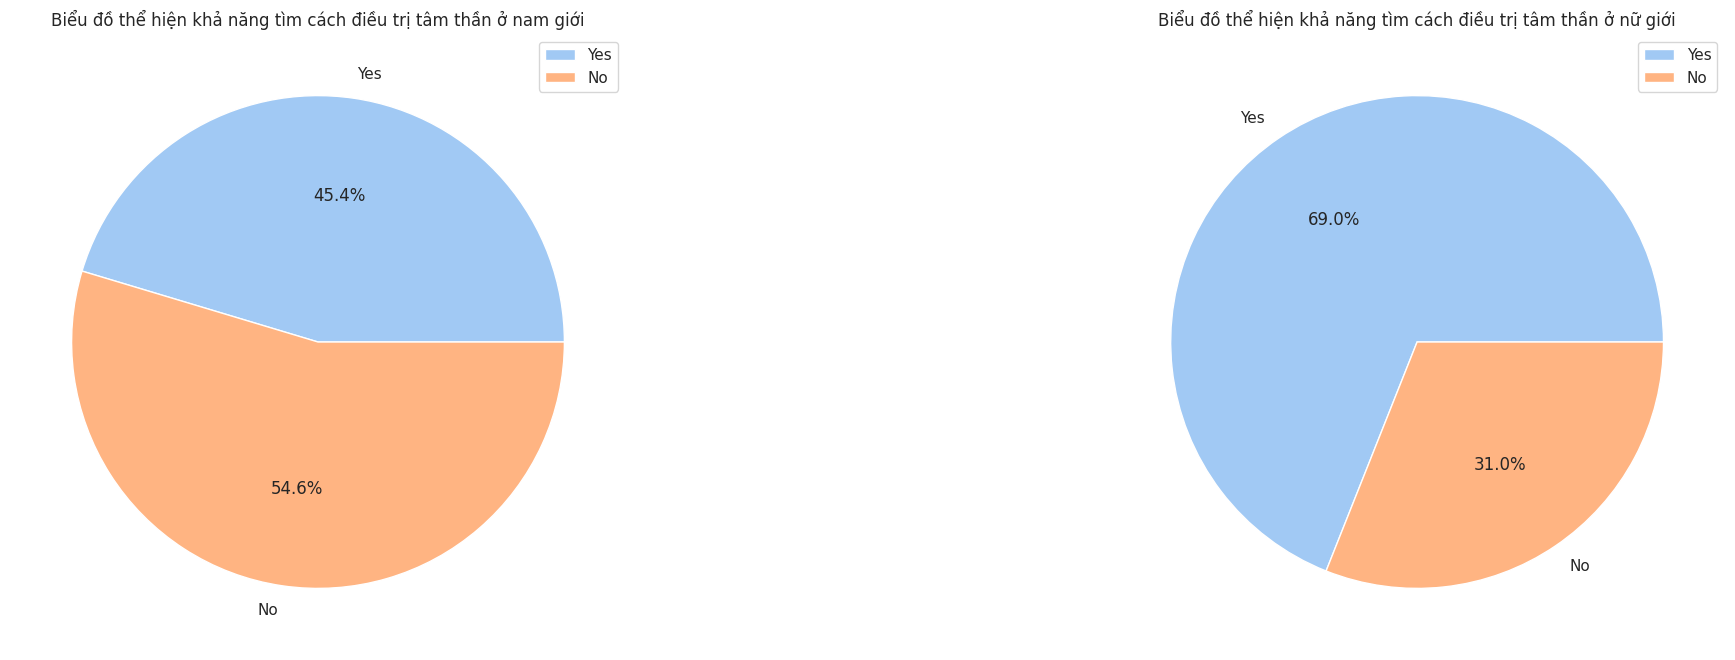

In [21]:
health_male_df = health_df[health_df['Gender'] == 'Male']['treatment'].value_counts().sort_index(ascending = False)
health_female_df = health_df[health_df['Gender'] == 'Female']['treatment'].value_counts().sort_index(ascending = False)
fig, ax = plt.subplots(1, 2, figsize = (26, 8))
ax[0].pie(health_male_df, labels = health_male_df.index, colors = sns.color_palette('pastel'), autopct = '%1.1f%%')
ax[0].set_title('Biểu đồ thể hiện khả năng tìm cách điều trị tâm thần ở nam giới')
ax[0].legend()
ax[1].pie(health_female_df, labels = health_female_df.index, colors = sns.color_palette('pastel'), autopct = '%1.1f%%')
ax[1].set_title('Biểu đồ thể hiện khả năng tìm cách điều trị tâm thần ở nữ giới')
ax[1].legend()
plt.show()

**Nhận xét:** Quan sát 2 biểu đồ trên, ta thấy tỉ lệ % nam giới tìm cách điều trị tâm thần ít hơn không cần điều trị tâm thần, tuy nhiên con số này không chênh lệch đáng kể. Ngược lại, **khoảng 69% nữ giới** sẽ tìm cách điều trị tâm thần. Điều đó cho thấy, nữ giới sẽ có xu hướng quan tâm sức khỏe, đặc biệt là các bệnh về thần kinh cao hơn nam giới nên sẽ tìm đến các phương pháp điều trị thường xuyên hơn.

### Biểu đồ thể hiện khả năng sẵn sàng thảo luận về vấn đề sức khỏe tâm thần với đồng nghiệp hoặc người giám sát

Ta sẽ dùng 2 biểu đồ cột để thể hiện khả năng sẵn sàng thảo luận về vấn đề sức khỏe tâm thần với đồng nghiệp hoặc người giám sát. Trong đó:
- Trục hoành: thể hiện các sự lựa chọn câu trả lời (Yes, No, Some of them).
- Trục tung: thể hiện số người.
- Màu xanh dương: thể hiện người trả lời có sẵn sàng thảo luận về vấn đề sức khỏe tâm thần (Yes).
- Màu cam: thể hiện người trả lời không muốn thảo luận về vấn đề này (No).
- Màu xanh lá: thể hiện người trả lời phân vân giữa việc có nên thảo luận hay không (Some of them).

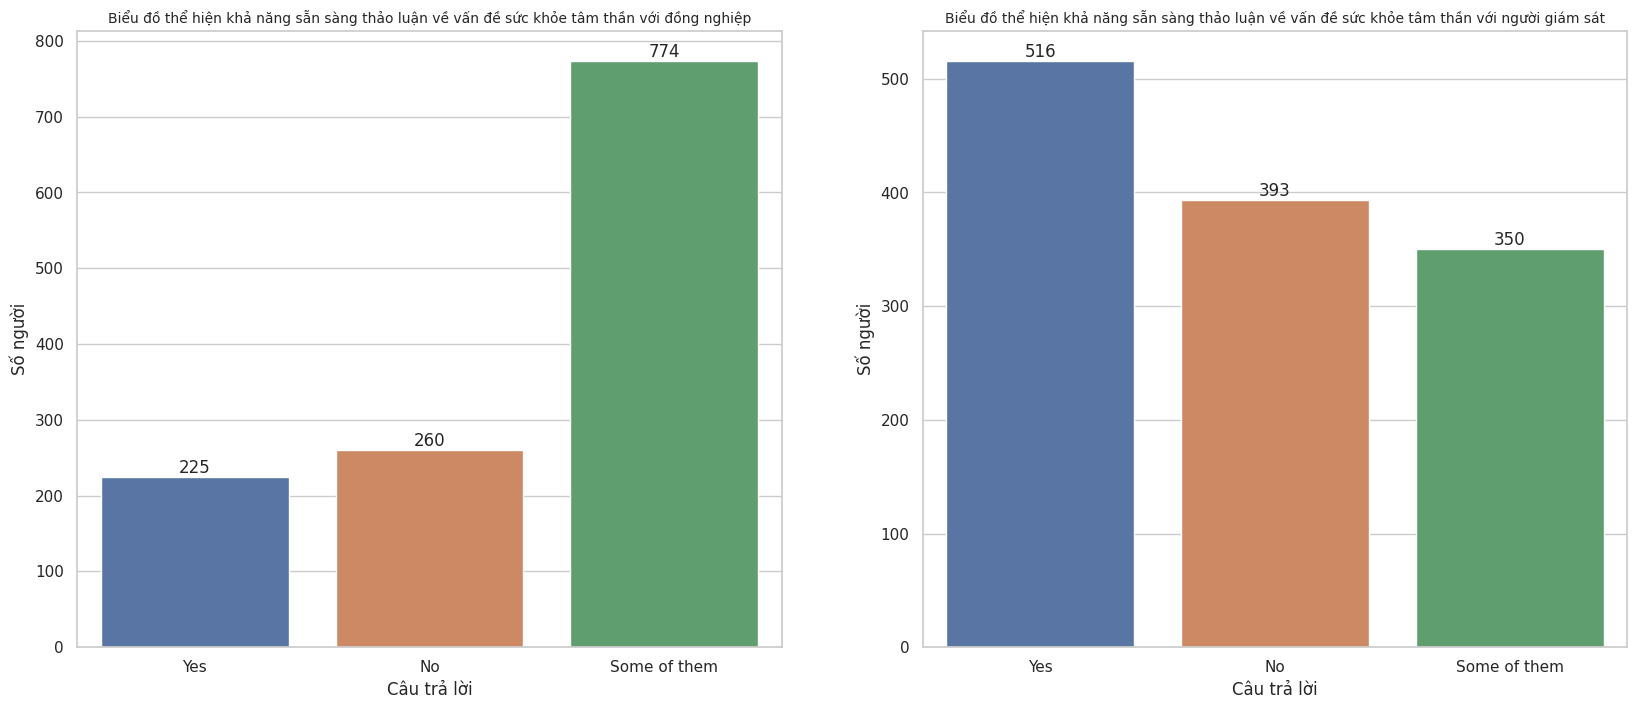

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.countplot(data = health_df, x = 'coworkers', order = ['Yes', 'No', 'Some of them'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Biểu đồ thể hiện khả năng sẵn sàng thảo luận về vấn đề sức khỏe tâm thần với đồng nghiệp', fontsize = 10)
ax[0].set_xlabel('Câu trả lời')
ax[0].set_ylabel('Số người')
sns.countplot(data = health_df, x = 'supervisor', order = ['Yes', 'No', 'Some of them'], ax = ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Biểu đồ thể hiện khả năng sẵn sàng thảo luận về vấn đề sức khỏe tâm thần với người giám sát', fontsize = 10)
ax[1].set_xlabel('Câu trả lời')
ax[1].set_ylabel('Số người')
plt.show()

**Nhận xét**: Quan sát 2 biểu đồ trên, ta có nhận xét như sau:
- Với biểu đồ bên trái thể hiện khả năng sẵn sàng thảo luận về vấn đề sức khỏe tâm thần với đồng nghiệp, có thể thấy rằng hầu hết mọi người đều cảm thấy thoải mái khi nói chuyện với một số đồng nghiệp về tình trạng của họ. Dễ thấy tổng số người chọn "Yes" và "Some of them" là **999 người**, chiếm tỉ lệ **(~79%)**.
- Khi so sánh với biểu đồ bên phải thể hiện khả năng sẵn sàng thảo luận về vấn đề sức khỏe tâm thần với người giám sát trực tiếp, ta có thể thấy tỉ lệ của sự lựa chọn không muốn thảo luận về vấn đề này với người giám sát ("No") cao hơn so với đồng nghiệp. Điều này có thể là do mức độ nghiêm trọng của bệnh tâm thần hoặc sự ảnh hưởng tiêu cực khá lớn đối với người được hỏi nên nhiều người chọn cách im lặng hơn.

# D. TIỀN XỬ LÝ DỮ LIỆU

### Xử lý các giá trị bị thiếu (Missing Values)

Trước tiên, ta sẽ tạo lại bảng thống kê mô tả về giá trị bị thiếu của các đặc trưng ở trên. Với mỗi cột, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100). Sau đó ta sẽ lưu các giá trị này vào dataframe `col_df` thành 2 dòng là "num_missing_val", "ratio_missing_val".

In [23]:
col_df = health_df.agg([num_missing_val, ratio_missing_val]).T
col_df['num_missing_val'] = col_df['num_missing_val'].astype(int)
col_df

,num_missing_val,ratio_missing_val
Timestamp,0,0.000000
Age,0,0.000000
Gender,0,0.000000
Country,0,0.000000
state,515,40.905481
self_employed,18,1.429706
family_history,0,0.000000
treatment,0,0.000000
work_interfere,264,20.969023
no_employees,0,0.000000


Dựa vào bảng thống kê mô tả của các đặc trưng ở trên, ta thấy có xuất hiện các giá trị bị thiếu ở các cột "state", "self_employed", "work_interfere", "comments".

Tuy nhiên cột "comments" có tỉ lệ % giá trị bị thiếu khá cao **(~87%)** nên ta sẽ chọn cách bỏ đi đặc trưng này khỏi bộ dữ liệu và cột "state" vừa bị thiếu giá trị vừa không có ý nghĩa đối với những người đến từ các quốc tịch khác Mỹ nên ta không thể tìm giá trị nào phù hợp để điền vào đây, do đó ta cũng sẽ chọn cách bỏ đi đặc trưng này khỏi bộ dữ liệu.

In [24]:
health_df.drop(['state'], axis = 1, inplace = True)
health_df.drop(['comments'], axis = 1, inplace = True)

Tiép theo, cột "self_employed" có tỉ lệ % giá trị bị thiếu khá ít **(~1.4%)** nên ta sẽ chọn cách thay các giá trị này thành "No" vì ta không chắc những người trả lời khảo sát đó đã tự làm chủ chưa.

In [25]:
health_df['self_employed'] = health_df['self_employed'].fillna('No')

Tiếp theo, cột "work_interfere" cũng bị thiếu giá trị khá cao **(~21%)** nên ta sẽ chọn cách thay các giá trị này thành "Don't know" vì ta không chắc về tần suất cản trở công việc thông qua tình trạng sức khỏe tâm thần.

In [26]:
health_df['work_interfere'] = health_df['work_interfere'].fillna('Don\'t know')

Sau đó, ta sẽ kiểm tra lại các giá trị bị thiếu có còn xuất hiện sau khi thực hiện tiền xử lý dữ liệu bị thiếu.

In [27]:
health_df.isnull().sum().sort_values(ascending = False)

Timestamp                    0
wellness_program             0
mental_vs_physical           0
phys_health_interview        0
mental_health_interview      0
supervisor                   0
coworkers                    0
phys_health_consequence      0
mental_health_consequence    0
leave                        0
anonymity                    0
seek_help                    0
care_options                 0
Age                          0
benefits                     0
tech_company                 0
remote_work                  0
no_employees                 0
work_interfere               0
treatment                    0
family_history               0
self_employed                0
Country                      0
Gender                       0
obs_consequence              0
dtype: int64

Có vẻ các cột đều không còn xuất hiện giá trị bị thiếu.

Cuối cùng, cột "Timestamp" có chứa thông tin phân biệt và không thể dùng cho các mô hình học máy sau này. Do đó, ta sẽ bỏ đi cột "Timestamp".

In [28]:
health_df.drop(['Timestamp'], axis = 1, inplace = True)

In [29]:
health_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [30]:
print(health_df.shape)

(1259, 24)


Sau khi tiền xử lý các giá trị bị thiếu, số chiều của dữ liệu đã giảm còn **1259 dòng x 24 cột**.

### Khám phá đặc trưng (Feature Engineering)

Trước tiên, ta sẽ vẽ biểu đồ cột để thể hiện phân phối của những người trả lời khảo sát theo độ tuổi. Trong đó:
- Trục hoành: thể hiện tuổi (Age).
- Trục tung: thể hiện số người theo từng độ tuổi.

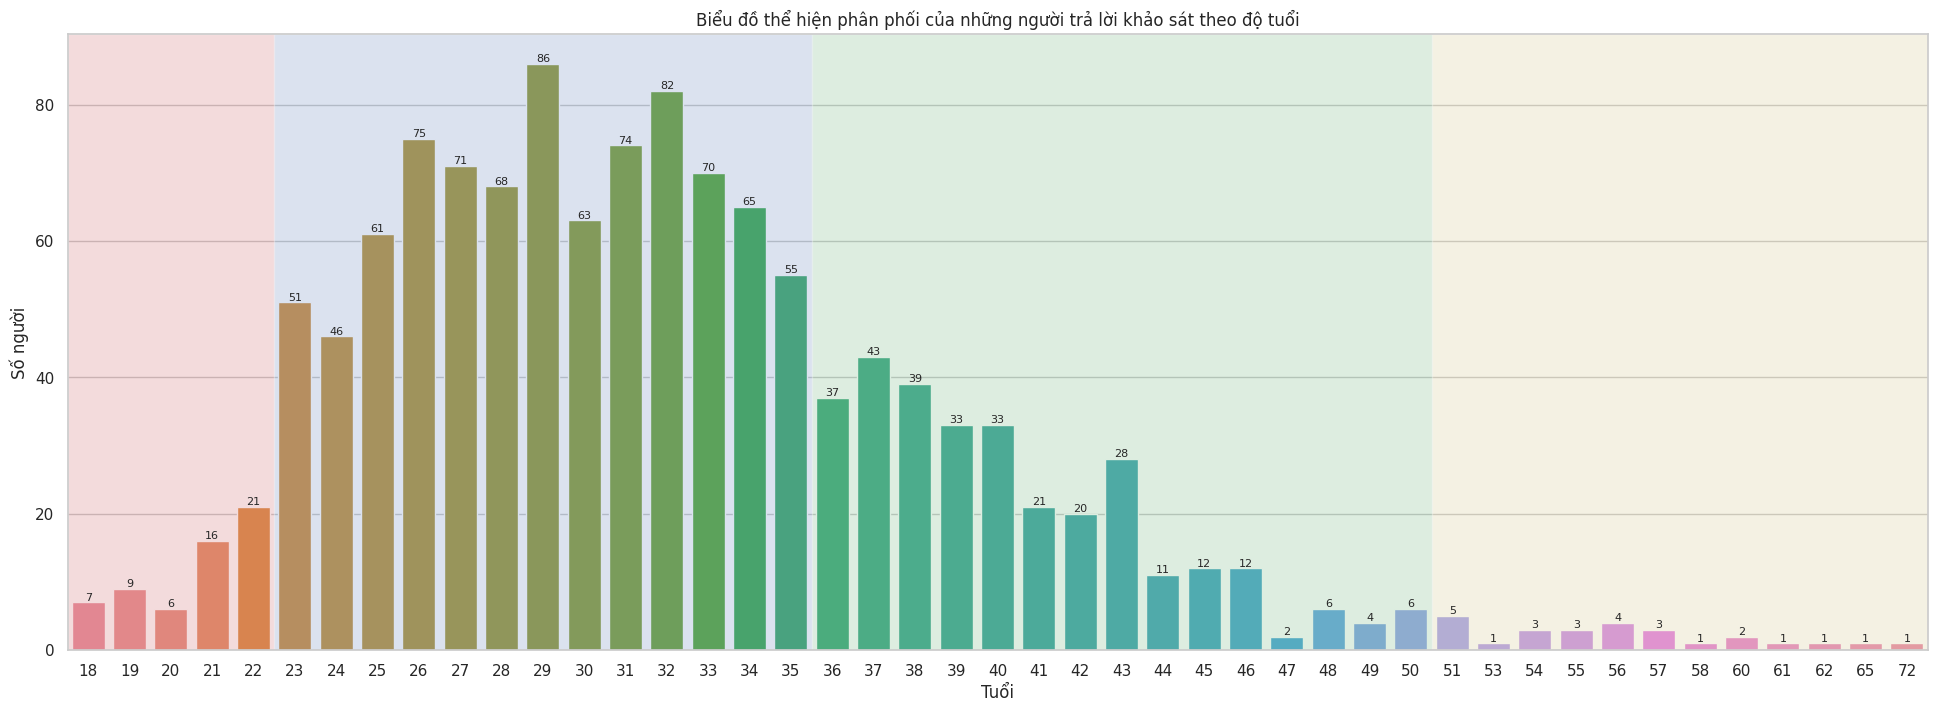

In [31]:
fig, ax = plt.subplots(figsize = (24, 8))
sns.countplot(data = health_df, x = 'Age', ax = ax)
ax.bar_label(ax.containers[0], fontsize = 8)
ax.set_xlim(left = -0.5)
plt.axvspan(-0.5, 4.5, facecolor = 'r', alpha = 0.2)
plt.axvspan(4.5, 17.5, facecolor = 'b', alpha = 0.2)
plt.axvspan(17.5, 32.5, facecolor = 'g', alpha = 0.2)
plt.axvspan(32.5, 44.5, facecolor = 'y', alpha = 0.2)
plt.title('Biểu đồ thể hiện phân phối của những người trả lời khảo sát theo độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số người')
plt.show()

Sau đó, ta sẽ dùng biểu đồ trên để phân thành 4 nhóm tuổi khác nhau như sau:
- **18-22:** từ 18 đến 22 tuổi, là những người có thể vừa học ở trường đại học, vừa làm các công việc thêm bên ngoài.
- **23-35:** từ 23 đến 35 tuổi, là những người trẻ đang làm việc cốt lõi cho các công ty hoặc tổ chức.
- **36-50:** từ 36 đến 50 tuổi, là những người đã có nhiều kinh nghiệm lâu năm làm việc, hoặc là chủ lao động của các công ty/tổ chức.
- **51-100:** từ 51 đến 100 tuổi, là những người ngoài độ tuổi lao động.

Tiếp theo, ta sẽ tạo ra cột "age_range" để phân loại nhóm tuổi dựa vào cột "Age".

In [32]:
health_df['age_range'] = pd.cut(health_df['Age'], [18, 22, 35, 50, 100], labels = ["18-22", "23-35", "36-50", "51-100"], include_lowest = True).astype(object)

In [33]:
health_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,36-50
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,36-50
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,23-35
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,23-35
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,23-35


Có vẻ các cột dữ liệu sau khi khám phá đặc trưng đều ổn.

### Mã hóa đặc trưng (Feature Encoding)

Để hoàn thiện quá trình biến dữ liệu dạng phân loại về dạng số phù hợp cho các mô hình học máy, ta cần mã hóa các cột này theo các phương pháp sau:
- Các cột dạng phân loại có thứ tự như "work_interfere", "leave", ta sẽ dùng phương pháp mã hóa Ordinal Encoding.
- Các cột dạng phân loại không có thứ tự như "Gender", "Country", "self_employed", "family_history", "treatment", "remote_work", "tech_company", "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "mental_health_consequence", "phys_health_consequence", "coworkers", "supervisor", "mental_health_interview", "phys_health_interview", "mental_vs_physical", "obs_consequence" ta sẽ dùng phương pháp mã hóa Label Encoding.
- Ngoại lệ cột "no_employees" là các cột dạng phân loại có thứ tự chia theo từng khoảng, ta sẽ xử lý như sau:
  - "1-25", "6-25", "26-100", "100-500", "500-1000": thay thế bằng giá trị trung bình (mean) tương ứng theo từng khoảng.
  - "More than 1000": thay thế bằng 1000.
- Tương tự cột "age_range" cũng là cột dạng phân loại có thự tự chia theo từng khoảng nên ta sẽ thay thế bằng giá trị trung bình (mean) tương ứng theo từng khoảng.

In [34]:
ordinal_cols = ['work_interfere', 'leave']
non_ordinal_cols = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 
                    'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# Ordinal Encoding
enc = OrdinalEncoder()
health_df[ordinal_cols] = enc.fit_transform(health_df[ordinal_cols])
for col in ordinal_cols:
  health_df[col] = health_df[col].astype(int)

# Label Encoding
le = LabelEncoder()
for col in non_ordinal_cols:
  health_df[col] = le.fit_transform(health_df[col])

# Range Ordinal Encoding
health_df['no_employees'] = health_df['no_employees'].replace({ '1-5': 3, '6-25': 15.5, '26-100': 63, '100-500': 300, '500-1000': 750, 'More than 1000': 1000 })
health_df['age_range'] = health_df['age_range'].replace({ '18-22': 20, '23-35': 29, '36-50': 43, '51-100': 75.5 })

Sau đó ta cần đưa cột "treatment" về cuối bảng vì đây là cột target của các bài toán học máy.

In [35]:
rearrange_features = health_df.columns.drop(['treatment'])
rearrange_features = rearrange_features.insert(len(rearrange_features), 'treatment')
health_df = health_df[rearrange_features]

In [36]:
health_df.head()

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range,treatment
0,37,0,45,0,0,2,15.5,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,43.0,1
1,44,1,45,0,0,3,1000.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,43.0,0
2,32,1,7,0,0,3,15.5,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,29.0,0
3,31,1,44,0,1,2,63.0,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,29.0,1
4,31,1,45,0,0,1,300.0,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,29.0,0


Xem thử kiểu dữ liệu của các cột dữ liệu sau khi tiền xử lý mã hóa đặc trưng.

In [37]:
health_df.dtypes

Age                            int64
Gender                         int64
Country                        int64
self_employed                  int64
family_history                 int64
work_interfere                 int64
no_employees                 float64
remote_work                    int64
tech_company                   int64
benefits                       int64
care_options                   int64
wellness_program               int64
seek_help                      int64
anonymity                      int64
leave                          int64
mental_health_consequence      int64
phys_health_consequence        int64
coworkers                      int64
supervisor                     int64
mental_health_interview        int64
phys_health_interview          int64
mental_vs_physical             int64
obs_consequence                int64
age_range                    float64
treatment                      int64
dtype: object

Tất cả các cột dữ liệu đã được đưa về dạng số.

### Chuyển đổi dữ liệu (Data Trasformation)

Ta sẽ dùng biểu đồ histogram đối với các cột dạng số (cột "Age") để biết được sự phân phối của dữ liệu. Đồng thời trong biểu đồ histogram ta cũng cần tính độ lệch (Skewness) tương ứng. Trong đó:
- Nếu độ lệch của đặc trưng đó có giá trị âm chứng tỏ phân phối dữ liệu của đặc trưng đó bị lệch trái.
- Nếu độ lệch của đặc trưng đó có giá trị dương chứng tỏ phân phối dữ liệu của đặc trưng đó bị lệch phải.

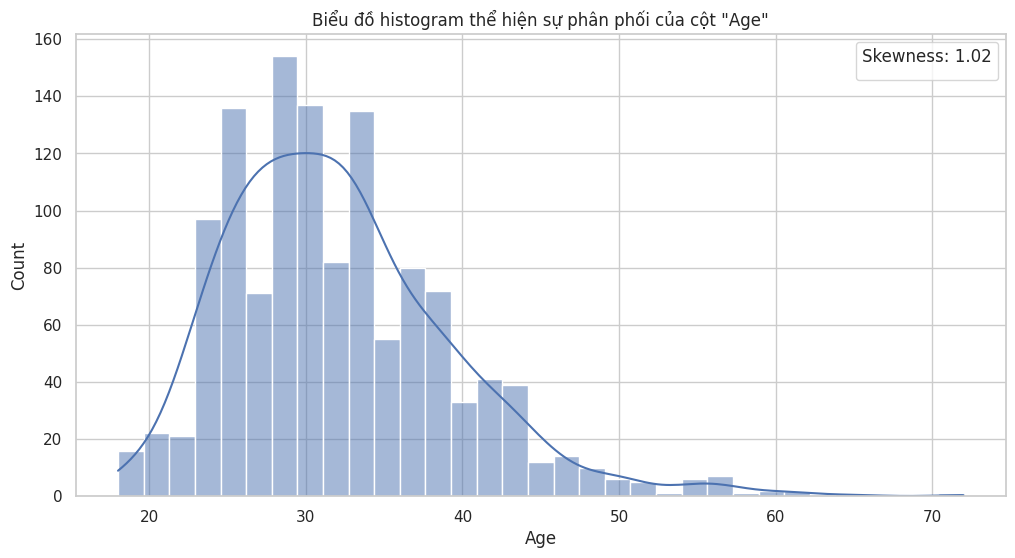

In [38]:
plt.figure(figsize = (12, 6))
sns.histplot(health_df['Age'], kde = True, legend = True)
plt.legend([], title = 'Skewness: %.2f'%(health_df['Age'].skew()))
plt.title('Biểu đồ histogram thể hiện sự phân phối của cột "Age"')
plt.show()

Quan sát biểu đồ trên, ta thấy biểu đồ có dạng **lệch trái** và độ lệch của đặc trưng này **lớn hơn 1**. Điều này có nghĩa dữ liệu chưa thuộc dạng phân phối chuẩn và ta cần sử dụng phương pháp Box Cox Transformation để đưa dữ liệu về gần giống với phân phối chuẩn nhất.

In [39]:
health_df['Age'], _ = boxcox(health_df['Age'])

Sau đó, ta cũng dùng lại biểu đồ histogram ở trên để biết được sự phân phối của dữ liệu sau khi đã chuyển đổi.

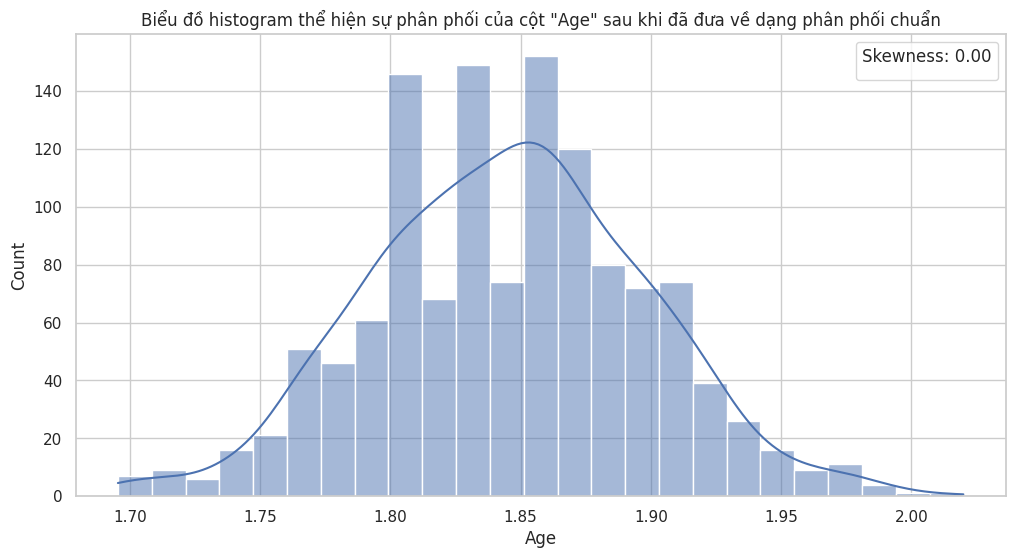

In [40]:
plt.figure(figsize = (12, 6))
sns.histplot(health_df['Age'], kde = True, legend = True)
plt.legend([], title = 'Skewness: %.2f'%(health_df['Age'].skew()))
plt.title('Biểu đồ histogram thể hiện sự phân phối của cột "Age" sau khi đã đưa về dạng phân phối chuẩn')
plt.show()

Quan sát các biểu đồ trên, ta thấy độ lệch sau khi tiền xử lý nằm trong khoảng **từ -1 đến 1** và biểu đồ có dạng hình chuông chứng tỏ dữ liệu đã được đưa về dạng phân phối chuẩn.

Cuối cùng, ta sẽ sử dụng phương pháp chuẩn hóa min-max (Min-Max Normalization) các giá trị có trong các cột dạng số để dễ dàng đưa vào các mô hình học máy sau này.

In [41]:
scaler = MinMaxScaler()
health_df[health_df.columns] = scaler.fit_transform(health_df)

In [42]:
health_df.head()

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range,treatment
0,0.589785,0.0,0.957447,0.0,0.0,0.50,0.012538,0.0,1.0,1.0,0.5,0.5,1.0,1.0,0.50,0.5,0.5,0.5,1.0,0.5,0.0,1.0,0.0,0.414414,1.0
1,0.707521,0.5,0.957447,0.0,0.0,0.75,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.5,0.0,0.0,0.5,0.5,0.0,0.0,0.414414,0.0
2,0.484504,0.5,0.148936,0.0,0.0,0.75,0.012538,0.0,1.0,0.5,0.0,0.5,0.5,0.0,0.25,0.5,0.5,1.0,1.0,1.0,1.0,0.5,0.0,0.162162,0.0
3,0.460637,0.5,0.936170,0.0,1.0,0.50,0.060181,0.0,1.0,0.5,1.0,0.5,0.5,0.5,0.25,1.0,1.0,0.5,0.0,0.0,0.0,0.5,1.0,0.162162,1.0
4,0.460637,0.5,0.957447,0.0,0.0,0.25,0.297894,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00,0.5,0.5,0.5,1.0,1.0,1.0,0.0,0.0,0.162162,0.0


Các cột dạng số đều có giá trị nằm trong khoảng từ 0 đến 1.

### Trích xuất đặc trưng (Feature Selection)

Đầu tiên, ta sẽ vẽ biểu đồ heatmap để thể hiện sự phụ thuộc và tương quan giữa các trường trong dữ liệu. Trong đó:
- Mỗi màu sắc càng đậm sẽ thể hiện độ tương quan càng mạnh (càng gần giá trị 1).
- Mỗi màu sắc càng nhạt sẽ thể hiện độ tương quan càng yếu (càng gần giá trị 0).

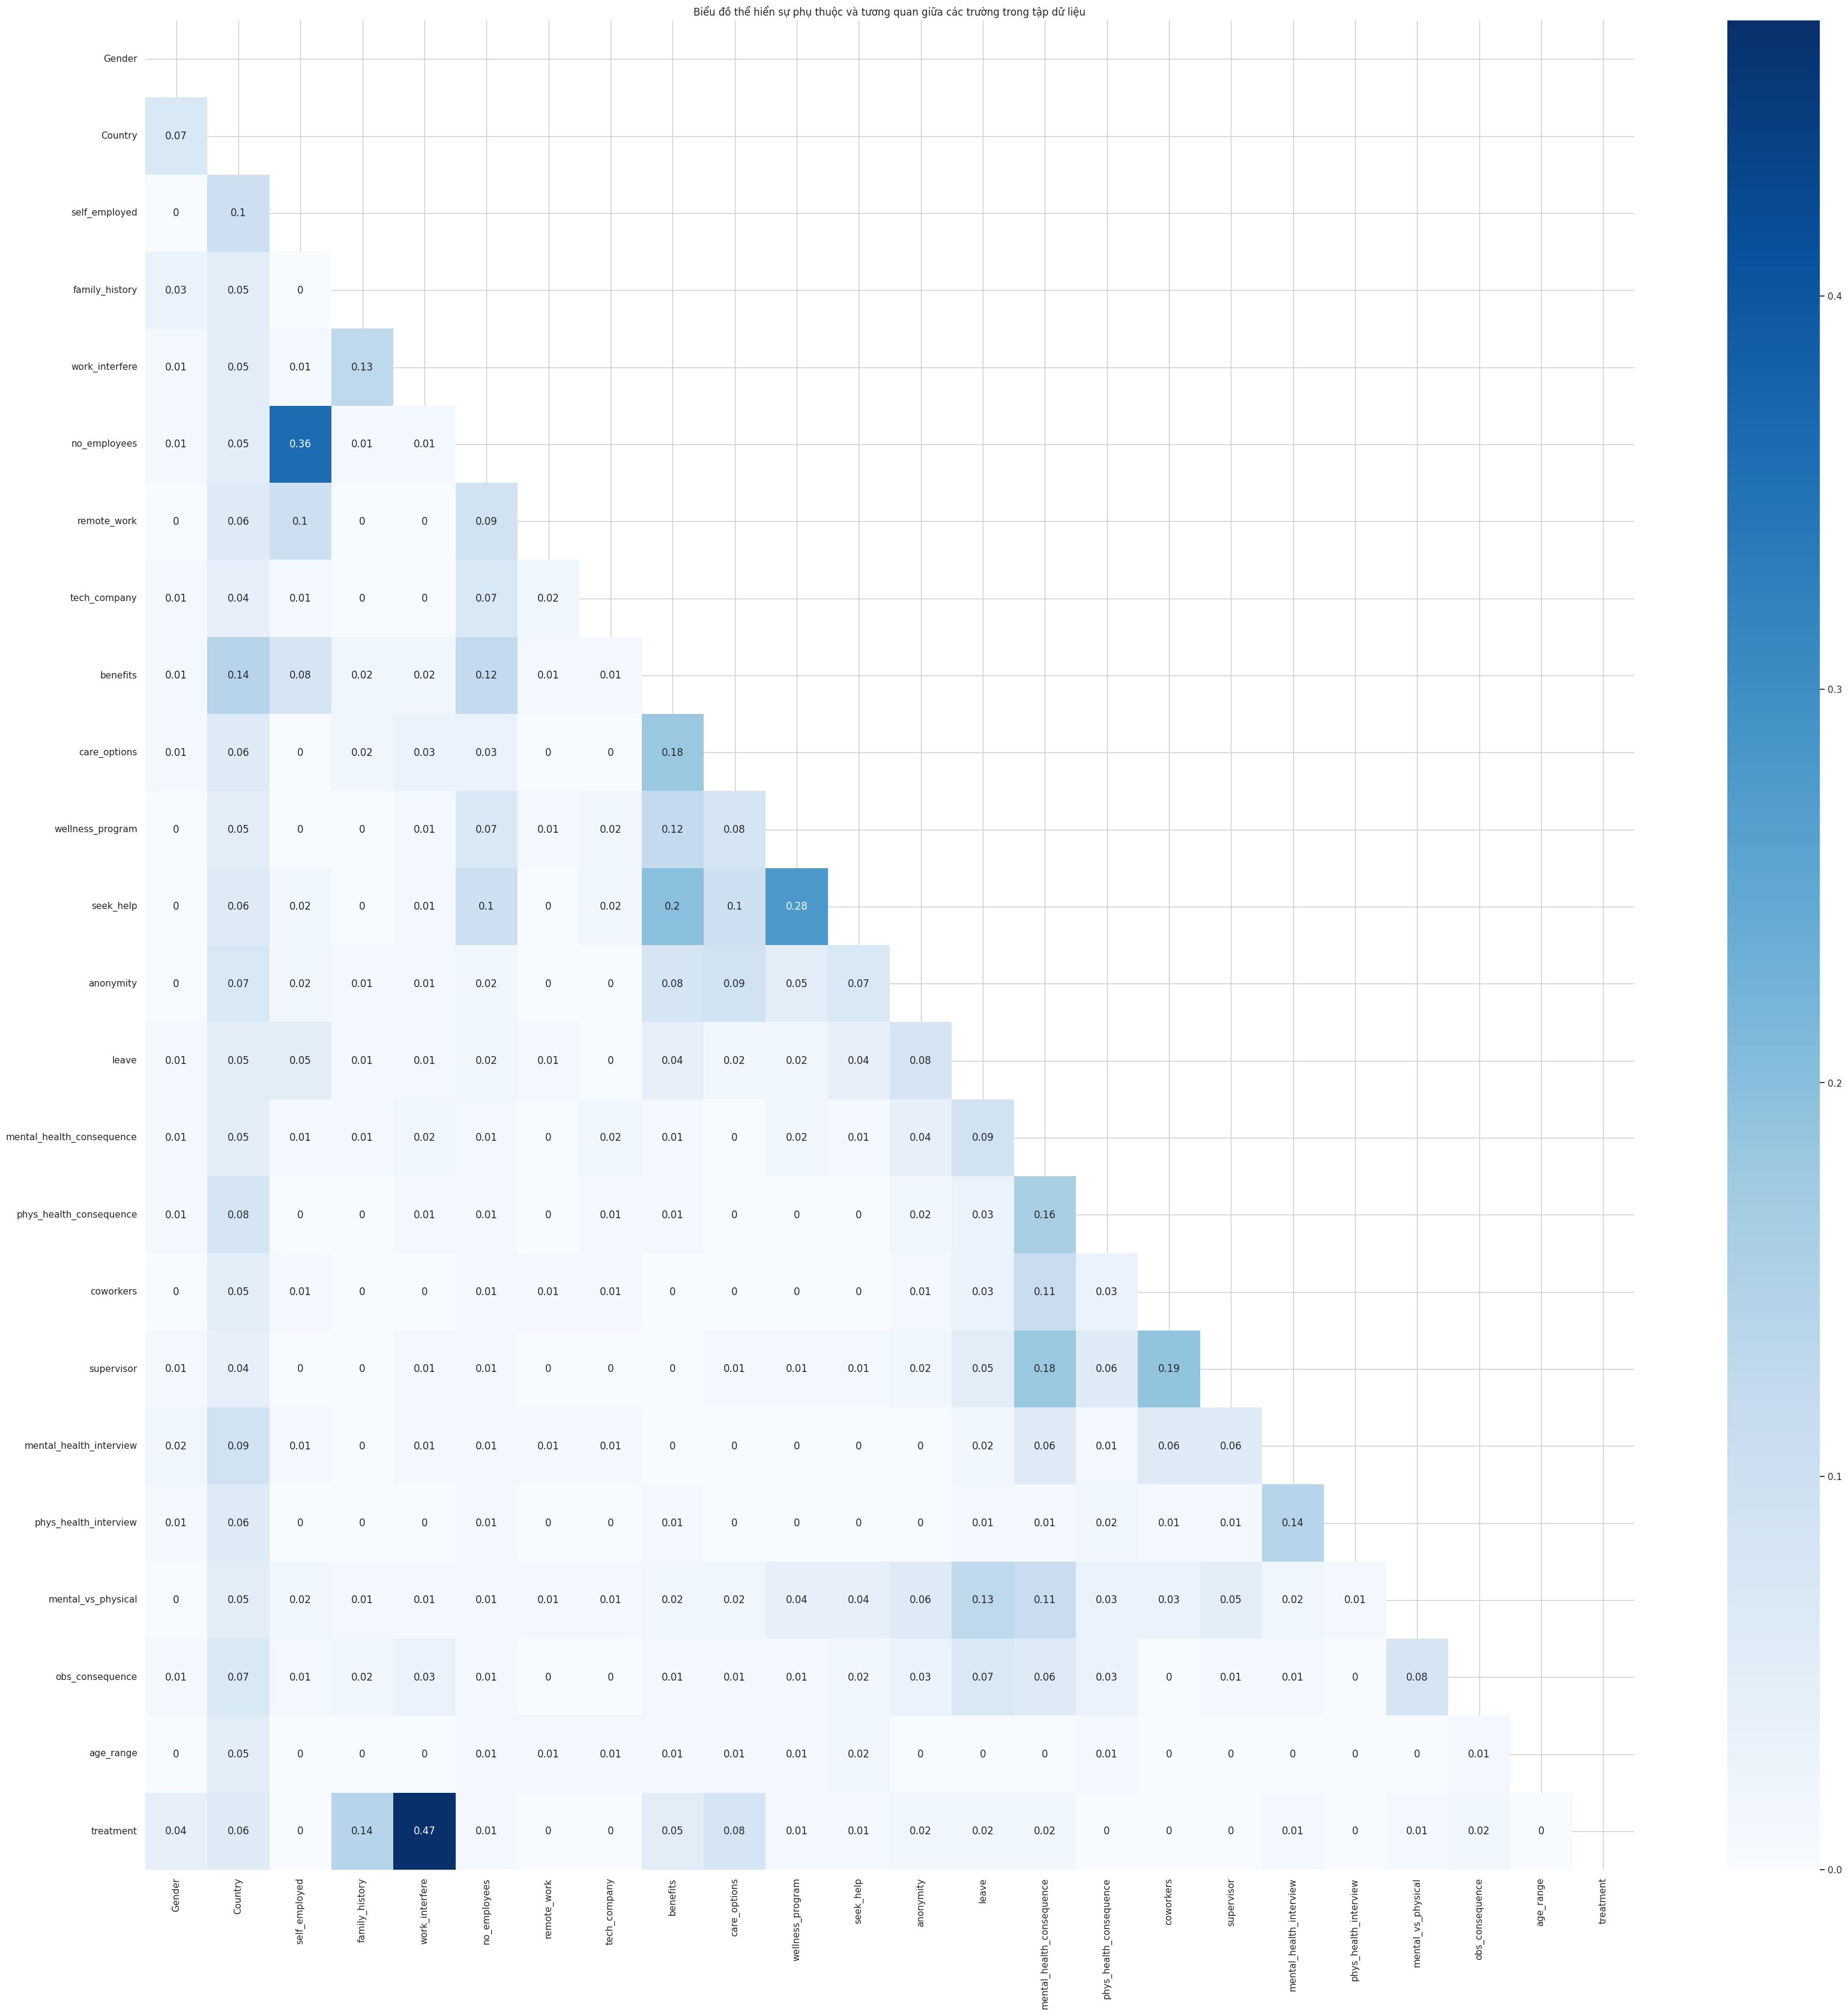

In [43]:
def cramers_V(var1, var2) :
    crosstab = np.array(pd.crosstab(var1, var2, rownames = None, colnames = None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1
    return (stat / (obs * mini))

def cramers_corr(df):
    rows = []
    for var1 in df:
        col = []
        for var2 in df:
            cramers = cramers_V(df[var1], df[var2])
            col.append(round(cramers, 2))
        rows.append(col)

    return pd.DataFrame(np.array(rows), columns = df.columns, index = df.columns)

correlation_features = health_df.columns.drop(['Age'])
plt.figure(figsize = (40, 40))
mask = np.triu(np.ones_like(health_df[correlation_features].corr(), dtype = bool))
sns.heatmap(cramers_corr(health_df[correlation_features]), mask = mask, annot = True, cmap = 'Blues')
plt.title('Biểu đồ thể hiển sự phụ thuộc và tương quan giữa các trường trong tập dữ liệu')
plt.show()

Quan sát biểu đồ trên, ta thấy có một số thuộc tính có tương quan mạnh với nhau, chẳng hạn:
- "seek_help" và "wellness_program" có độ tương quan là **0.28**, điều này cũng dễ hiểu vì ý nghĩa nội dung câu hỏi của cả 2 thuộc tính tương đồng nhau.
- "no_employee" và "self_employed" có độ tương quan là **0.36**, điều này cũng dễ hiểu vì thường những người tự làm chủ thì không tính số nhân viên trong công ty.

Ta sẽ xem các thuộc tính có giá trị **lớn hơn 0.3** có mối tương quan mạnh, do đó ta sẽ loại bỏ cột "self_employed" ra khỏi bộ dữ liệu.

In [44]:
health_df.drop(['self_employed'], axis = 1, inplace = True)

Sau đó, ta sẽ liệt kê độ tương quan của từng thuộc tính với "treatment" để đánh giá các thuộc tính quan trọng của dữ liệu.

In [45]:
cramers_corr(health_df[health_df.columns.drop(['Age'])])['treatment'].sort_values(ascending = False)

treatment                    1.00
work_interfere               0.47
family_history               0.14
care_options                 0.08
Country                      0.06
benefits                     0.05
Gender                       0.04
leave                        0.02
mental_health_consequence    0.02
obs_consequence              0.02
anonymity                    0.02
wellness_program             0.01
seek_help                    0.01
no_employees                 0.01
mental_health_interview      0.01
mental_vs_physical           0.01
tech_company                 0.00
remote_work                  0.00
phys_health_consequence      0.00
coworkers                    0.00
supervisor                   0.00
phys_health_interview        0.00
age_range                    0.00
Name: treatment, dtype: float64

Như vậy, có thể thấy các thuộc tính còn lại đều có tương quan với "treatment". Sau đó, ta sẽ sử dụng phương pháp Stepwise: Forward/Backward để chọn ra những đặc trưng phù hợp nhất sẽ sử dụng trong mô hình hồi quy. Phương pháp này sẽ kiểm tra lặp đi lặp lại ý nghĩa thống kê của từng biến độc lập trong một mô hình hồi quy tuyến tính. Các đặc trưng nằm trong ngưỡng cho trước (**threshold**) được chọn làm đặc trưng tốt, nếu nằm ngoài ngưỡng đó sẽ được xem là đặc trưng xấu và bỏ khỏi các lựa chọn đặc trưng cho mô hình.

In [46]:
def stepwise_selection(X, y, initial_list = [], threshold_in = 0.05, threshold_out = 0.05, verbose = True):
  included = list(initial_list)
  while True:
    changed = False

    # forward step
    excluded = list(set(X.columns) - set(included))
    new_pval = pd.Series(index = excluded)
    for new_column in excluded:
      model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
      new_pval[new_column] = model.pvalues[new_column]
    best_pval = new_pval.min()
    if best_pval < threshold_in:
      best_feature = new_pval.idxmin()
      included.append(best_feature)
      changed = True
      if verbose:
        print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
    
    # backward step
    model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
    # use all coefs except intercept
    pvalues = model.pvalues.iloc[1:]
    worst_pval = pvalues.max() # null if pvalues is empty
    if worst_pval > threshold_out:
      changed = True
      worst_feature = pvalues.idxmax()
      included.remove(worst_feature)
      if verbose:
        print('Drop  {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
    if not changed:
      break
  return included

X = health_df[health_df.columns.drop(['treatment'])]
y = health_df['treatment']
result = stepwise_selection(X, y)

Add  work_interfere                 with p-value 8.4475e-132
Add  family_history                 with p-value 4.75629e-18
Add  benefits                       with p-value 2.27347e-09
Add  care_options                   with p-value 0.000165559
Add  coworkers                      with p-value 0.00236198
Add  Gender                         with p-value 0.00321734
Add  obs_consequence                with p-value 0.0121837
Add  phys_health_interview          with p-value 0.035381


Theo phương pháp trên ta chọn lọc được một số đặc trưng tốt nhất cho việc xây dựng mô hình: "work_interfere", "family_history", "benefits", "care_options", "coworkers", "Gender", "obs_consequence", "phys_health_interview". Ta vẫn sẽ giữ cột "treatment" vì đây là thuộc tính target của dữ liệu. Các cột còn lại ta ta loại bỏ đi.

In [47]:
health_df = health_df[result + ['treatment']]

# E. XÂY DỰNG MÔ HÌNH HỌC MÁY

### Bài toán cần giải quyết là gì?

Dựa vào thông tin độ tuổi, giới tính, nơi làm việc, tình trạng sức khỏe, ... của một người để đưa ra các dự đoán tình trạng sức khỏe tâm thần và nhu cầu trị liệu nếu gặp phải.

### Có những giả thuyết nào để giải quyết bài toán?

Các giả thuyết có thể để giải quyết bài toán: 
- Hồi quy: Logistic Regression
- Phân lớp: Decision Tree, Random Forest, Native Bayes
- Gom cụm: K-Nearest Neighbors
- Neural Network: Deep Neural Network, 
- Multimodel: XGBoost, LightBGM

Ta sẽ thử nghiệm với từng loại mô hình sau:
- Logistic Regression: mô hình đơn giản
- Decision Tree, Random Forest: có thuộc tính phân loại
- K-Nearest Neighbors: mô hình có nhãn cho trước


### Thiết kế mô hình học máy

Đầu tiên, ta sẽ xem lại bộ dữ liệu sau khi đã qua bước tiền xử lý.

In [48]:
health_df.head()

,work_interfere,family_history,benefits,care_options,coworkers,Gender,obs_consequence,phys_health_interview,treatment
0,0.50,0.0,1.0,0.5,0.5,0.0,0.0,0.0,1.0
1,0.75,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0
2,0.75,0.0,0.5,0.0,1.0,0.5,0.0,1.0,0.0
3,0.50,1.0,0.5,1.0,0.5,0.5,1.0,0.0,1.0
4,0.25,0.0,1.0,0.0,0.5,0.5,0.0,1.0,0.0


Tiến hành chia tập dữ liệu thành 2 tập train và tập test với tỉ lệ 70/30.

In [49]:
X = health_df[result]
y = health_df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Sau đó, ta sẽ định nghĩa hàm đánh giá mô hình `evaluate_model`. Dựa vào hàm này ta sẽ biết được các giá trị sau:
- `accuracy`: tỉ lệ giữa số mẫu dự đoán chính xác trên tất cả các mẫu.
- `precision`: tỉ lệ giữa số mẫu có kết quả đúng được dự đoán chính xác trên tất cả các mẫu có kết quả đúng.
- `confusion`: đánh giá kết quả phân loại dựa vào việc xem xét tất cả những chỉ số về độ chính xác và độ bao quát của các dự đoán cho từng lớp.

Đồng thời ta sẽ vẽ biểu đồ heatmap để trực quan hóa confusion matrix. Trong đó:
- **True positive (TP)**: Số các ca dự đoán dương tính đúng hay dương tính thật.
- **True negative (TN)**: Số các ca dự đoán âm tính đúng hay âm tính thật.
- **False positive (FP)**: Số các ca dự đoán dương tính sai hay dương tính giả.
- **False negative (FN)**: Số các ca dự đoán âm tính sai hay âm tính giả.

Và ta sẽ vẽ biểu đồ histogram cho tỉ lệ dự đoán mô hình. Trong đó:
- Các cột dữ liệu càng về gần 0 tức là kết quả dự đoán gần với trả lời không cần điều trị sức khỏe tâm thần.
- Các cột dữ liệu càng về gần 1 tức là kết quả dự đoán gần với trả lời có quan tâm tới việc điều trị sức khỏe tâm thần.

In [50]:
def evaluate_model(model, y_test, y_pred_class):
  # Accuracy score
  accuracy = accuracy_score(y_test, y_pred_class)

  # Precision score
  precision = precision_score(y_test, y_pred_class)

  # Confusion matrix
  confusion = confusion_matrix(y_test, y_pred_class)

  # Visualize confusion matrix
  fig, ax = plt.subplots(1, 2, figsize = (18, 6))
  sns.heatmap(confusion, annot = True, fmt = 'd', ax = ax[0]) 
  ax[0].set_title('Confusion Matrix')
  ax[0].set_xlabel('Predicted')
  ax[0].set_ylabel('Actual')
    
  # Visualize histogram of predicted probabilities
  y_pred_prob = model.predict_proba(X_test)[:, 1]
  ax[1].hist(y_pred_prob, bins = 8)
  ax[1].set_xlim(0, 1)
  ax[1].set_title('Histogram of predicted probabilities')
  ax[1].set_xlabel('Predicted probability of treatment')
  ax[1].set_ylabel('Frequency')

  plt.show()

  return accuracy, precision, confusion

Sau đó, ta sẽ tạo một dataframe `evaluation_df` để lưu trữ các kết quả metric đánh giá của các loại mô hình.

In [51]:
evaluation_df = pd.DataFrame(columns = ['accuracy_score', 'precision_score'])

#### Logistic Regression

Xây dựng mô hình

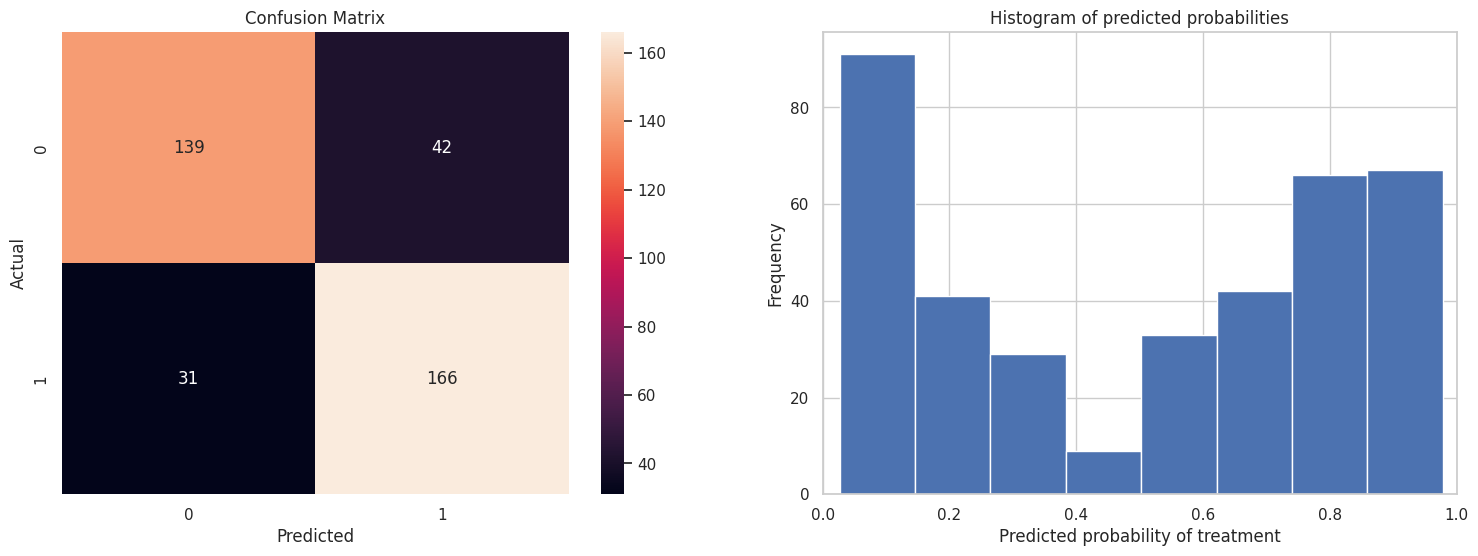

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
accuracy, precision, confusion = evaluate_model(logreg, y_test, y_pred_class)

Đánh giá mô hình

In [53]:
evaluation_df.loc['Logistic Regression'] = [accuracy, precision]
evaluation_df.loc['Logistic Regression']

accuracy_score     0.806878
precision_score    0.798077
Name: Logistic Regression, dtype: float64

#### Decision Tree

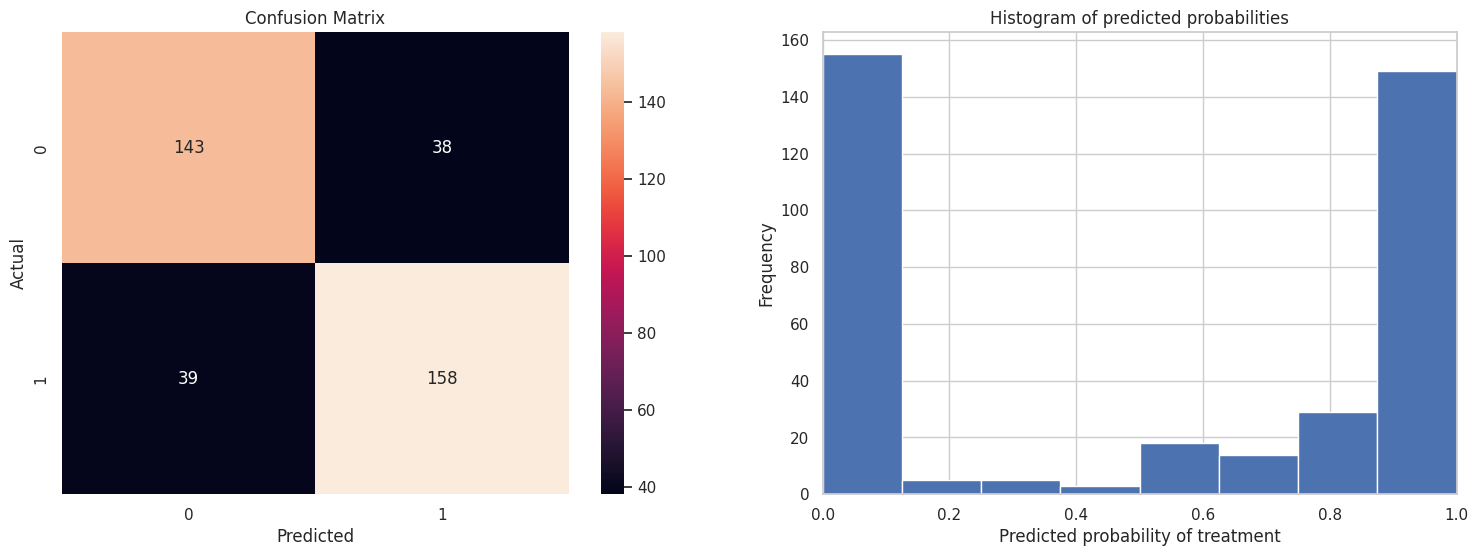

In [54]:
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train, y_train)
y_pred_class = tree.predict(X_test)
accuracy, precision, confusion = evaluate_model(tree, y_test, y_pred_class)

In [55]:
evaluation_df.loc['Decision Tree'] = [accuracy, precision]
evaluation_df.loc['Decision Tree']

accuracy_score     0.796296
precision_score    0.806122
Name: Decision Tree, dtype: float64

#### Random Forest

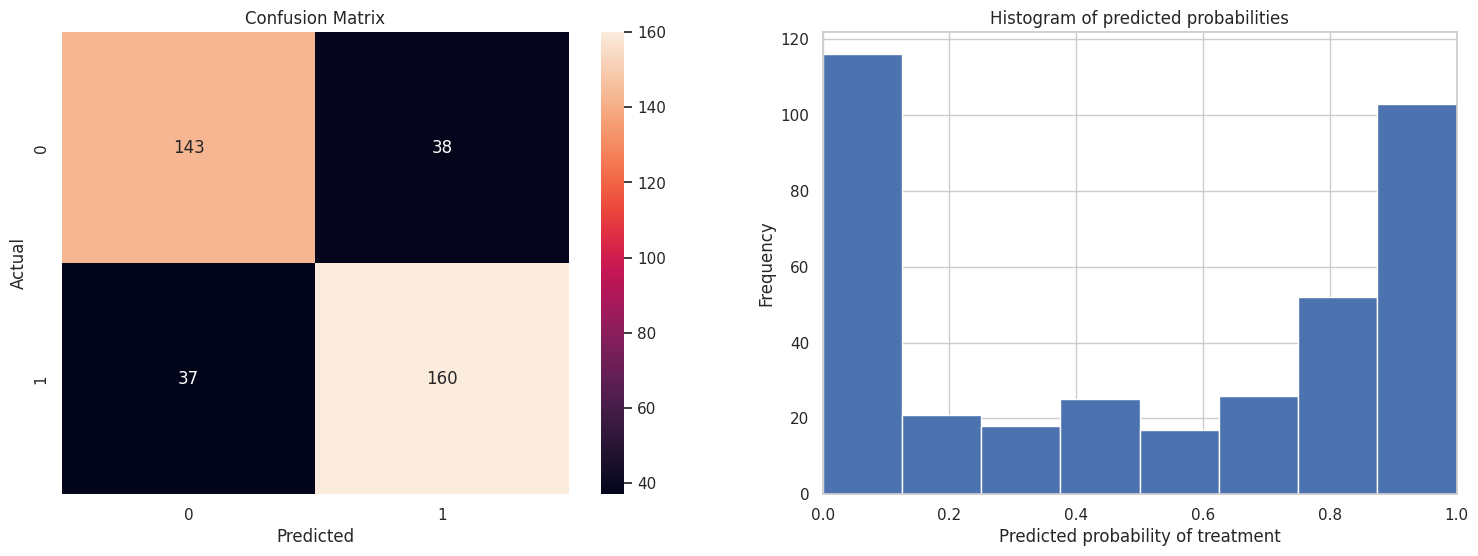

In [56]:
forest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 420)
forest.fit(X_train, y_train)
y_pred_class = forest.predict(X_test)
accuracy, precision, confusion = evaluate_model(forest, y_test, y_pred_class)

In [57]:
evaluation_df.loc['Random Forest'] = [accuracy, precision]
evaluation_df.loc['Random Forest']

accuracy_score     0.801587
precision_score    0.808081
Name: Random Forest, dtype: float64

#### K-Nearest Neighbors

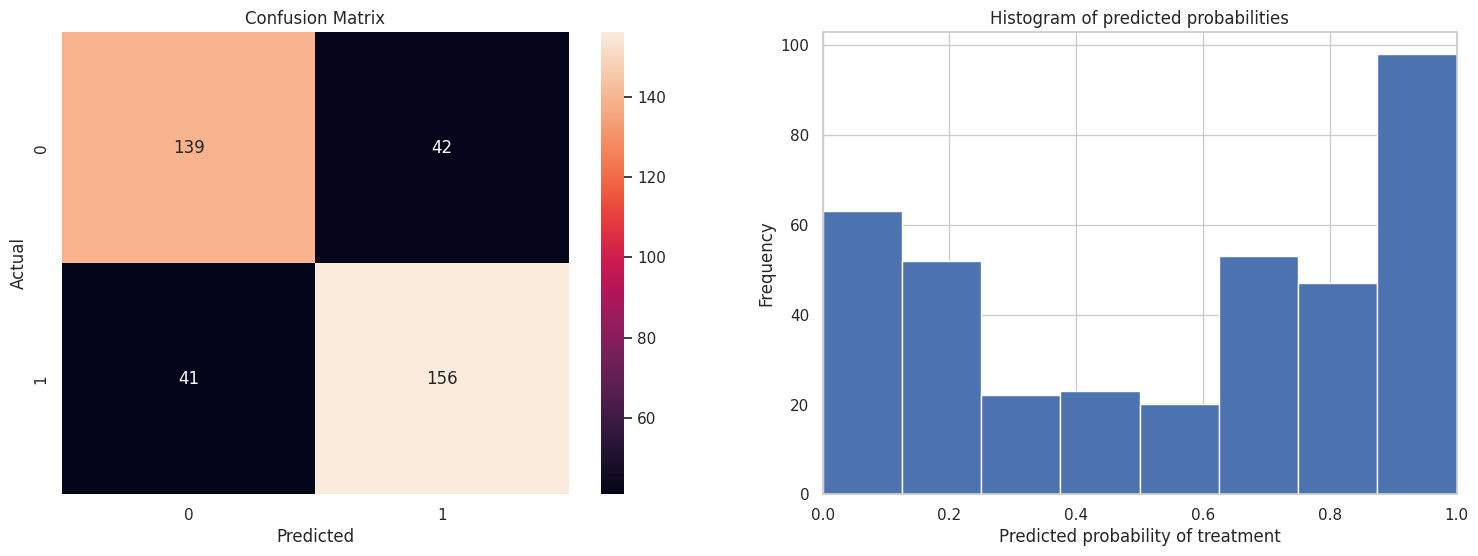

In [58]:
knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform')
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
accuracy, precision, confusion = evaluate_model(knn, y_test, y_pred_class)

In [59]:
evaluation_df.loc['K-Nearest Neighbors'] = [accuracy, precision]
evaluation_df.loc['K-Nearest Neighbors']

accuracy_score     0.780423
precision_score    0.787879
Name: K-Nearest Neighbors, dtype: float64

### Kết quả thực nghiệm

Cuối cùng, ta sẽ vẽ biểu đồ cột ngang để thể hiện các kết quả đánh giá mô hình. Trong đó:
- Trục tung: thể hiện tên của các loại mô hình học máy sử dụng.
- Trục hoành: thể hiện giá trị chính xác theo từng độ đo.
- Màu xanh: thể hiện kết quả của độ đo accuracy.
- Màu cam: thể hiện kết quả của độ đo precision.

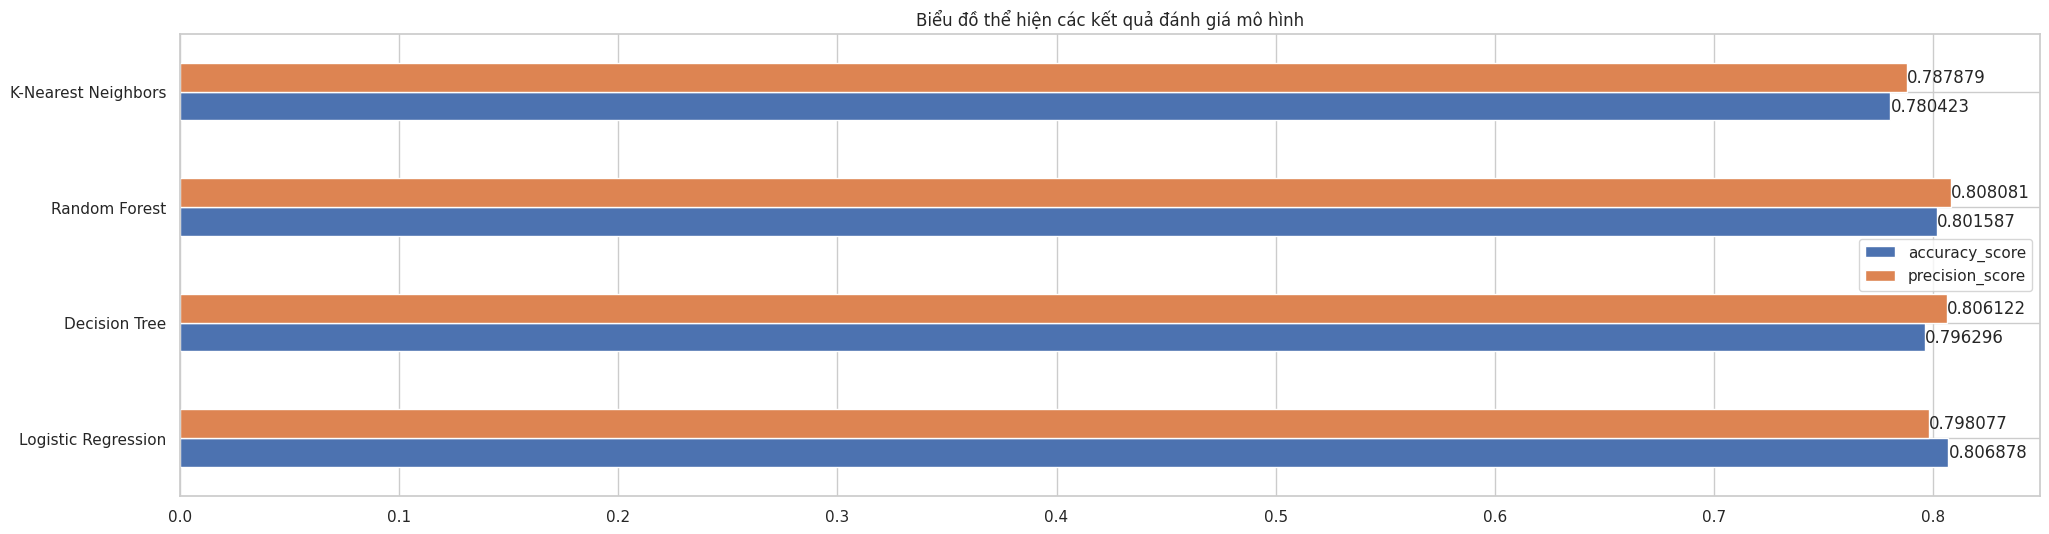

In [60]:
ax = evaluation_df.plot.barh(title = 'Biểu đồ thể hiện các kết quả đánh giá mô hình', figsize = (24, 6))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend()
plt.show()

**Nhận xét:** Quan sát biểu đồ trên, ta thấy cả về độ đo accuracy và precision của các mô hình đều trên **78%**. Cụ thể:
- Mô hình Random Forest có cả độ đo accuracy và precision đều cao, do đó đây là mô hình phù hợp nhất để giải quyết bài toàn.
- Nếu xét riêng độ đo accuracy thì mô hình Logistic Regression cho kết quả tốt nhất (độ chính xác **80.69%**), ngược lại mô hình K-Nearest Neighbors cho kết quả tệ nhất trong các mô hình lựa chọn ở trên (độ chính xác **78.04%**).
- Nếu xét riêng độ đo precision thì mô hình Random Forest cho kết quả tốt nhất (độ chính xác **80.81%**), ngược lại mô hình K-Nearest Neighbors cho kết quả tệ nhất trong các mô hình lựa chọn ở trên (độ chính xác **78.79%**).

### Trả lời câu hỏi

#### Làm thế nào để thiết kế mô hình?

Thiết kế mô hình học máy bao gồm các bước sau:
- Thu thập và chuẩn bị dữ liệu cho việc huấn luyện mô hình
- Lựa chọn thuật toán phù hợp cho bài toán
- Thiết lập cấu trúc mô hình và cấu hình các siêu tham số
- Huấn luyện mô hình trên dữ liệu huấn luyện
- Đánh giá hiệu suất của mô hình trên dữ liệu kiểm tra
- Tinh chỉnh mô hình và lặp lại quá trình huấn luyện và đánh giá đến khi đạt được hiệu suất tốt nhất trên dữ liệu kiểm tra

#### Quá trình tối ưu hóa?

Ta có thể tối ưu hóa các mô hình học máy bằng cách điều chỉnh các tham số và cấu trúc của mô hình thông qua việc thử nghiệm một số tham số cố định có trong mô hình, sau đó đánh giá bằng một số độ đo và cuối cùng xét kết quả chính xác để xem tham số nào phù hợp với mô hình học máy, từ đó có thể để đạt được hiệu suất tốt nhất trên bộ dữ liệu đã cho.

#### Cần học gì trong mô hình? Làm thế nào để xử lý quá khớp?

Dưới đây là một số phương pháp xử lý quá khớp trong các mô hình thông thường:
- Logistic Regression:
  - Sử dụng kỹ thuật trích chọn đặc trưng (Feature Selection): Lựa chọn các đặc trưng quan trọng và loại bỏ các đặc trưng không quan trọng để giảm quá khớp.
  - Sử dụng kỹ thuật chính quy hóa (Regularization): Thêm một số hạng mục (L1 Regularization hoặc L2 Regularization) vào hàm mất mát (loss function) để giảm quá khớp.
- Decision Tree và Random Forest:
  - Giảm độ sâu của cây: Nếu cây quá sâu, nó sẽ dễ dẫn đến quá khớp.
  - Sử dụng kỹ thuật cắt tỉa (pruning): Loại bỏ các nhánh cây không cần thiết và giảm số lượng lá của cây.
  - Sử dụng Random Forest: Kết hợp nhiều cây quyết định để giảm quá khớp và tăng khả năng tổng quát hóa.
- K-Nearest Neighbors:
  - Chọn giá trị k hợp lý: Giá trị k quá lớn có thể dẫn đến sự quá khớp, trong khi giá trị k quá nhỏ có thể làm giảm độ chính xác.
  - Sử dụng kỹ thuật giảm chiều dữ liệu: Giảm số chiều của dữ liệu đầu vào để giảm kích thước của không gian tìm kiếm.

Trên thực tế, không có phương pháp nào phù hợp cho tất cả các trường hợp, nên ta cần tập trung quá trình tinh chỉnh mô hình để đạt được kết quả tốt nhất.

# F. TÀI LIỆU THAM KHẢO

- [EDA of U.S. Mental Health in Tech](https://www.kaggle.com/code/chungbrandon/eda-of-u-s-mental-health-in-tech) by [Brandon Chung](https://www.kaggle.com/chungbrandon)
- [Machine Learning for Mental Health](https://www.kaggle.com/code/kairosart/machine-learning-for-mental-health-1) by [kairos](https://www.kaggle.com/kairosart)